<div align=right>
Dylan Clairmont<br>
Chunyang Zhang<br>
</div>

<h1 align=center>Word Cloud Visualization</h1>

<font color='darkblue'> <h2>Learning Objectives</h2> </font>

* Learn the basics of visualization using: wordcloud, including various parameters
* Apply the visualization principles and guidelines to k-pop reddit data 
* Understand why wordclouds are incomplete and typically need to be suplemented with additional visualization(s)

Word Clouds are great visualization tools for working with text data. Word Clouds create a visualization of top text terms in a certain text corpus, with the larger the word, the more frequent it appears in the corpus. Word Clouds are a great first step to get a visual idea of what your text data looks like before using more advanced computational methods. However, as we touched on in class, Word Cloud's alone are NOT enough! Often, they need to be accompanied by some sort of other visualization, such as a bar graph with top term frequency. This way, we have more of a quantiative understanding of the data, rather than simply replying on the visual word cloud to explain the data to us. 

**Wordcloud documentation: https://amueller.github.io/word_cloud/generated/wordcloud.WordCloud.html**

In this exercise, we will be working with text data that I scraped from Reddit using Reddit's API. We will be creating Word Cloud visualizations for posts from two subreddit communities - Blackpink and Newjeans, two popular k-pop groups. Blackpink is a very established, popular group in the k-pop scene, with a lot of songs and experience. Newjeans, in comparison, is far newer and less established, however they have grown a lot of popularity recently as a new, "gen-z" type of k-pop group. Do we see different terms come up for each group? Anything about age, newness, establishment, or even cross-references of the groups in the different subreddit communities? Let's find out! 

In [16]:
#import packages
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator #wordcloud includes its own stopwords function, which we will use to remove stopwords
import matplotlib.pyplot as plt #to visualize our wordcloud 
%matplotlib inline
import pandas as pd #to read in the csv files 
import numpy as np
from PIL import Image
import nltk

In [17]:
#read in the data
blackpink = pd.read_csv('blackpink.csv') 
newjeans = pd.read_csv('newjeans.csv')

In [18]:
#visualize our data
print(blackpink.head())
print(newjeans.head())

   Unnamed: 0.1  Unnamed: 0  subreddit  \
0             0           0  BlackPink   
1             1           1  BlackPink   
2             2           2  BlackPink   
3             3           3  BlackPink   
4             4           4  BlackPink   

                                               title  \
0  [MEXICO] If I only needed to buy 2 tickets wit...   
1  230207 Blackpink wins Group Of The Year and Mu...   
2  230207 Margaret__Zhang Weibo Update w/ Rosé, D...   
3                230207 Central Cee posted Blackpink   
4  Is being distinguishable one of the factors th...   

                                            selftext  upvote_ratio  \
0                                                NaN          1.00   
1                                                NaN          1.00   
2                                                NaN          0.96   
3                                                NaN          0.98   
4  Before Blackpink, I wasn't really interested i...        

In [19]:
#visualize the column of text data that we want to use for the wordcloud 
print(blackpink.text)
print(newjeans.text)

0        mexico needed tickets presale code someone else
1      blackpink wins group year music video year pur...
2      margaret__zhang weibo update rosé khaled mark ...
3                               central posted blackpink
4      distinguishable factors made blackpink famous ...
                             ...                        
984                   bryanboy twitter update jisoo lisa
985                                 rosé vogue hong kong
986    sabrina carpenter reveals dream collaborators ...
987    blackpink paul tollet organizer founder coache...
988               destinyrogers story update lisa jennie
Name: text, Length: 989, dtype: object
0      newjeans currently highest monthly listeners s...
1            billboard newjeans newjeans_ador weeks peak
2                  light jeans musinsa photoshoot behind
3      newjeans danielle severely underrated maybe us...
4                 called ditto like word ditto mean song
                             ...                 

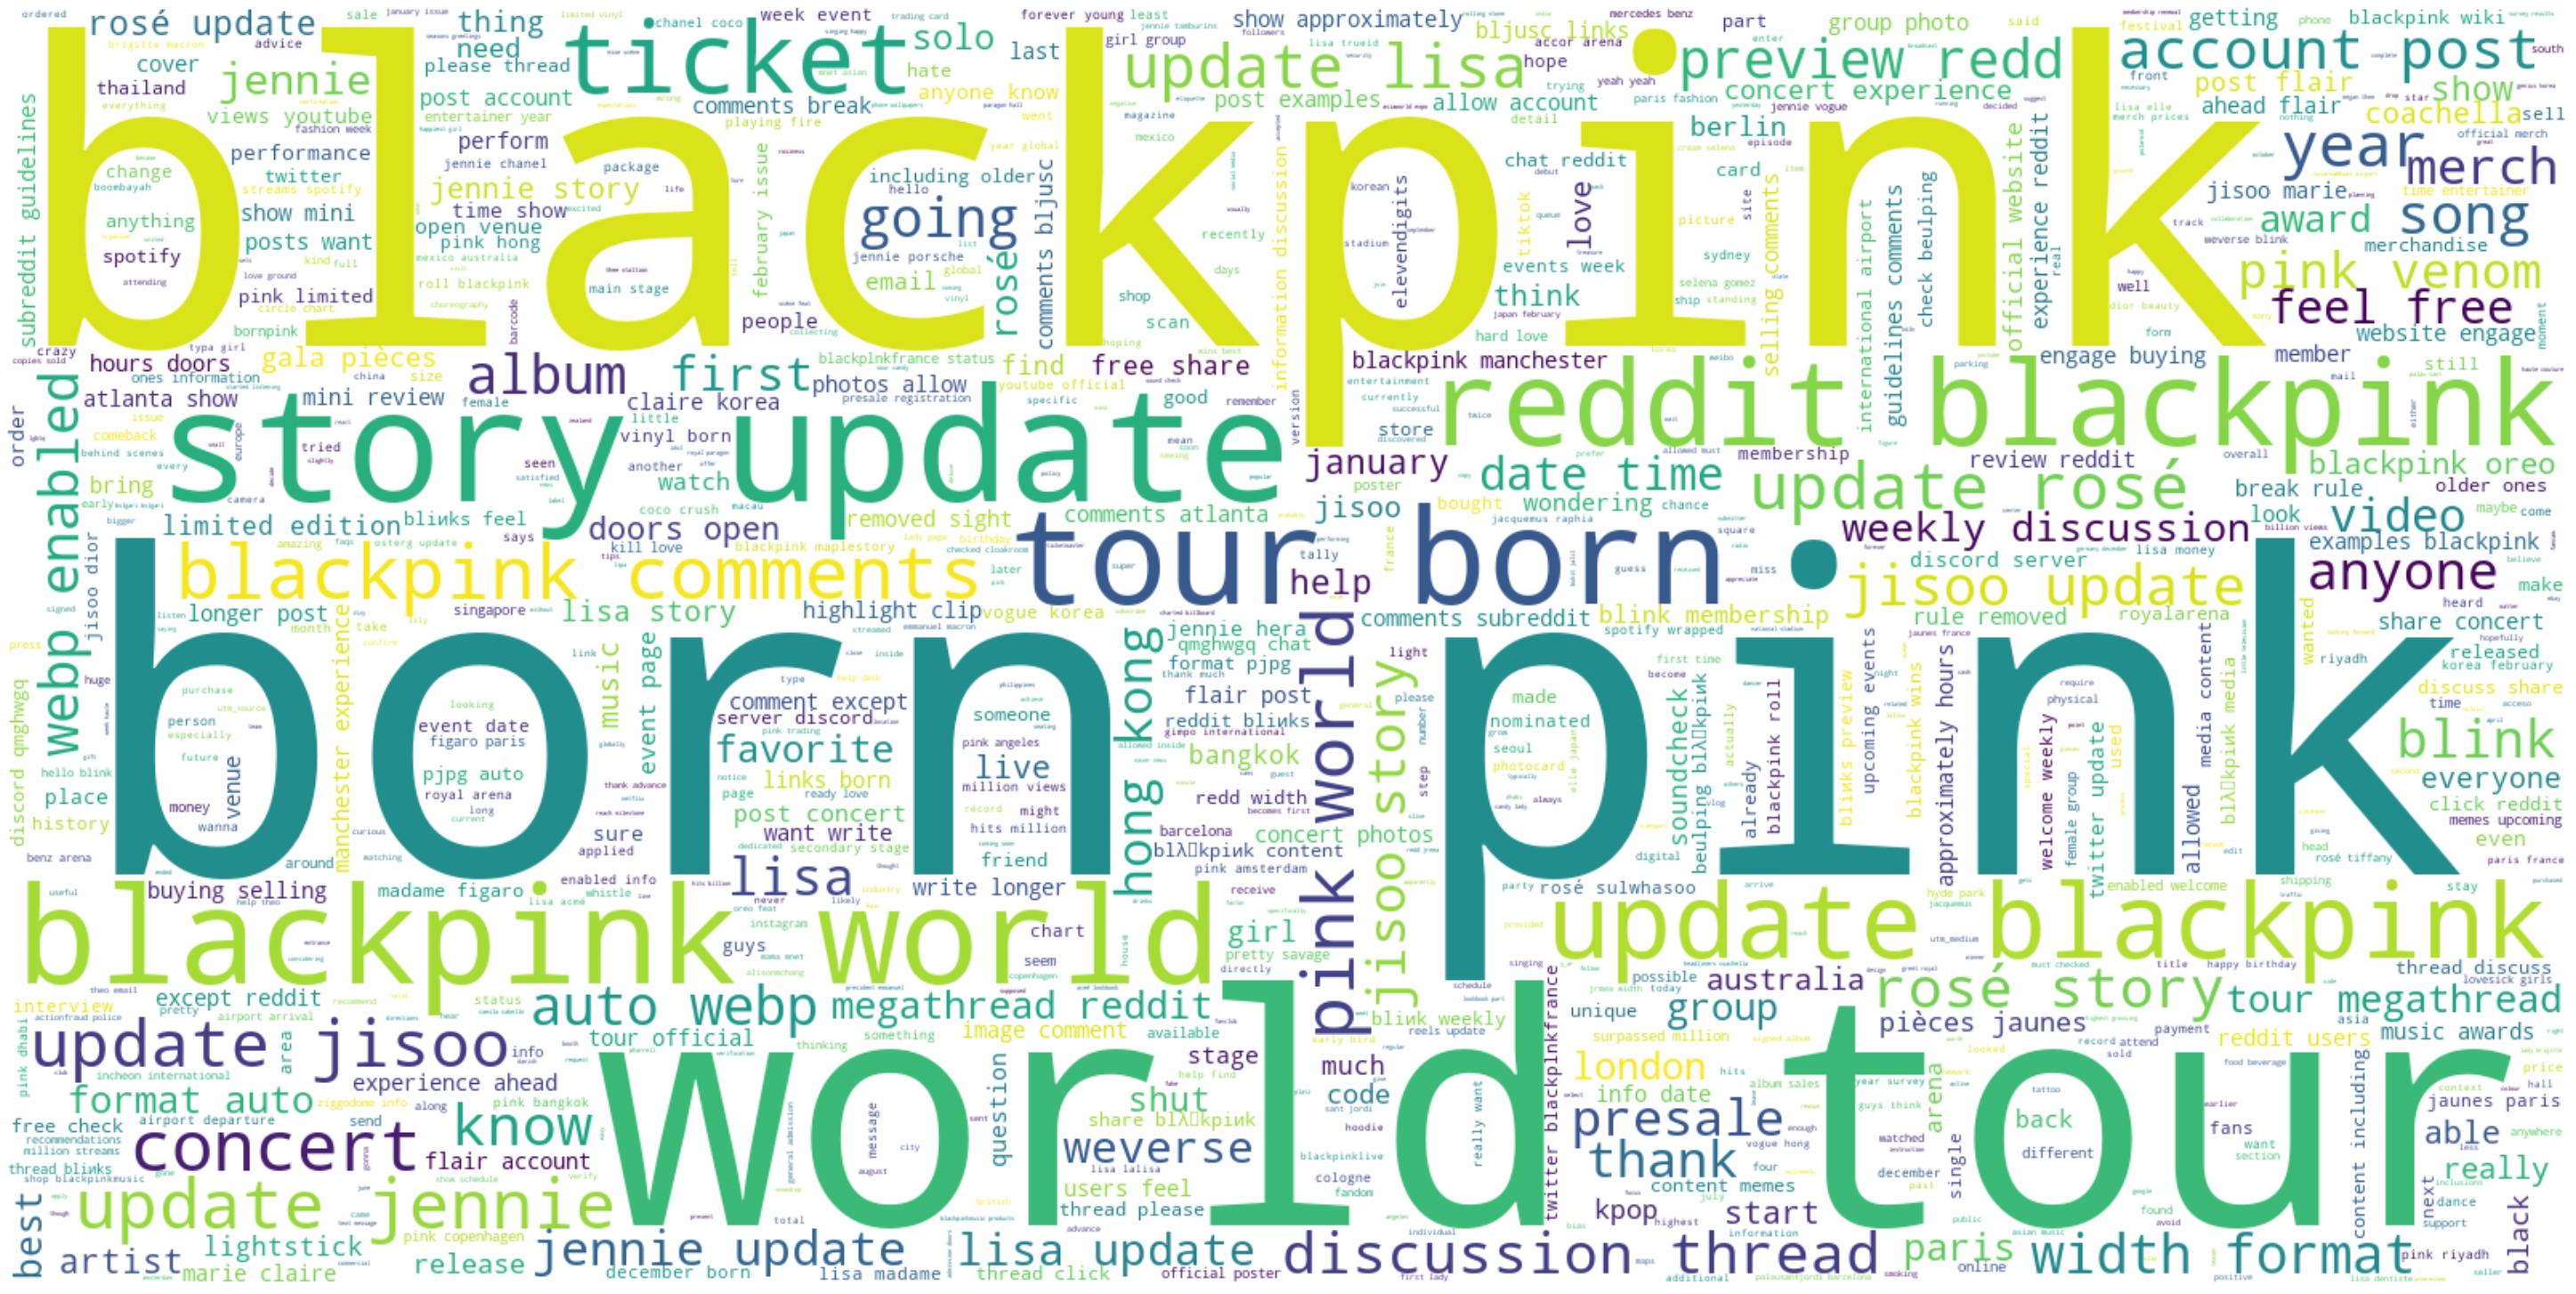

In [7]:
#Word cloud for Blackpink
cloud = WordCloud(max_words = 1800, 
                  width = 1600, 
                  height = 800,
                  stopwords = STOPWORDS, 
                  background_color = "white").generate(" ".join(blackpink.text))
plt.figure(figsize=(40, 30))
plt.imshow(cloud, interpolation="bilinear")
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

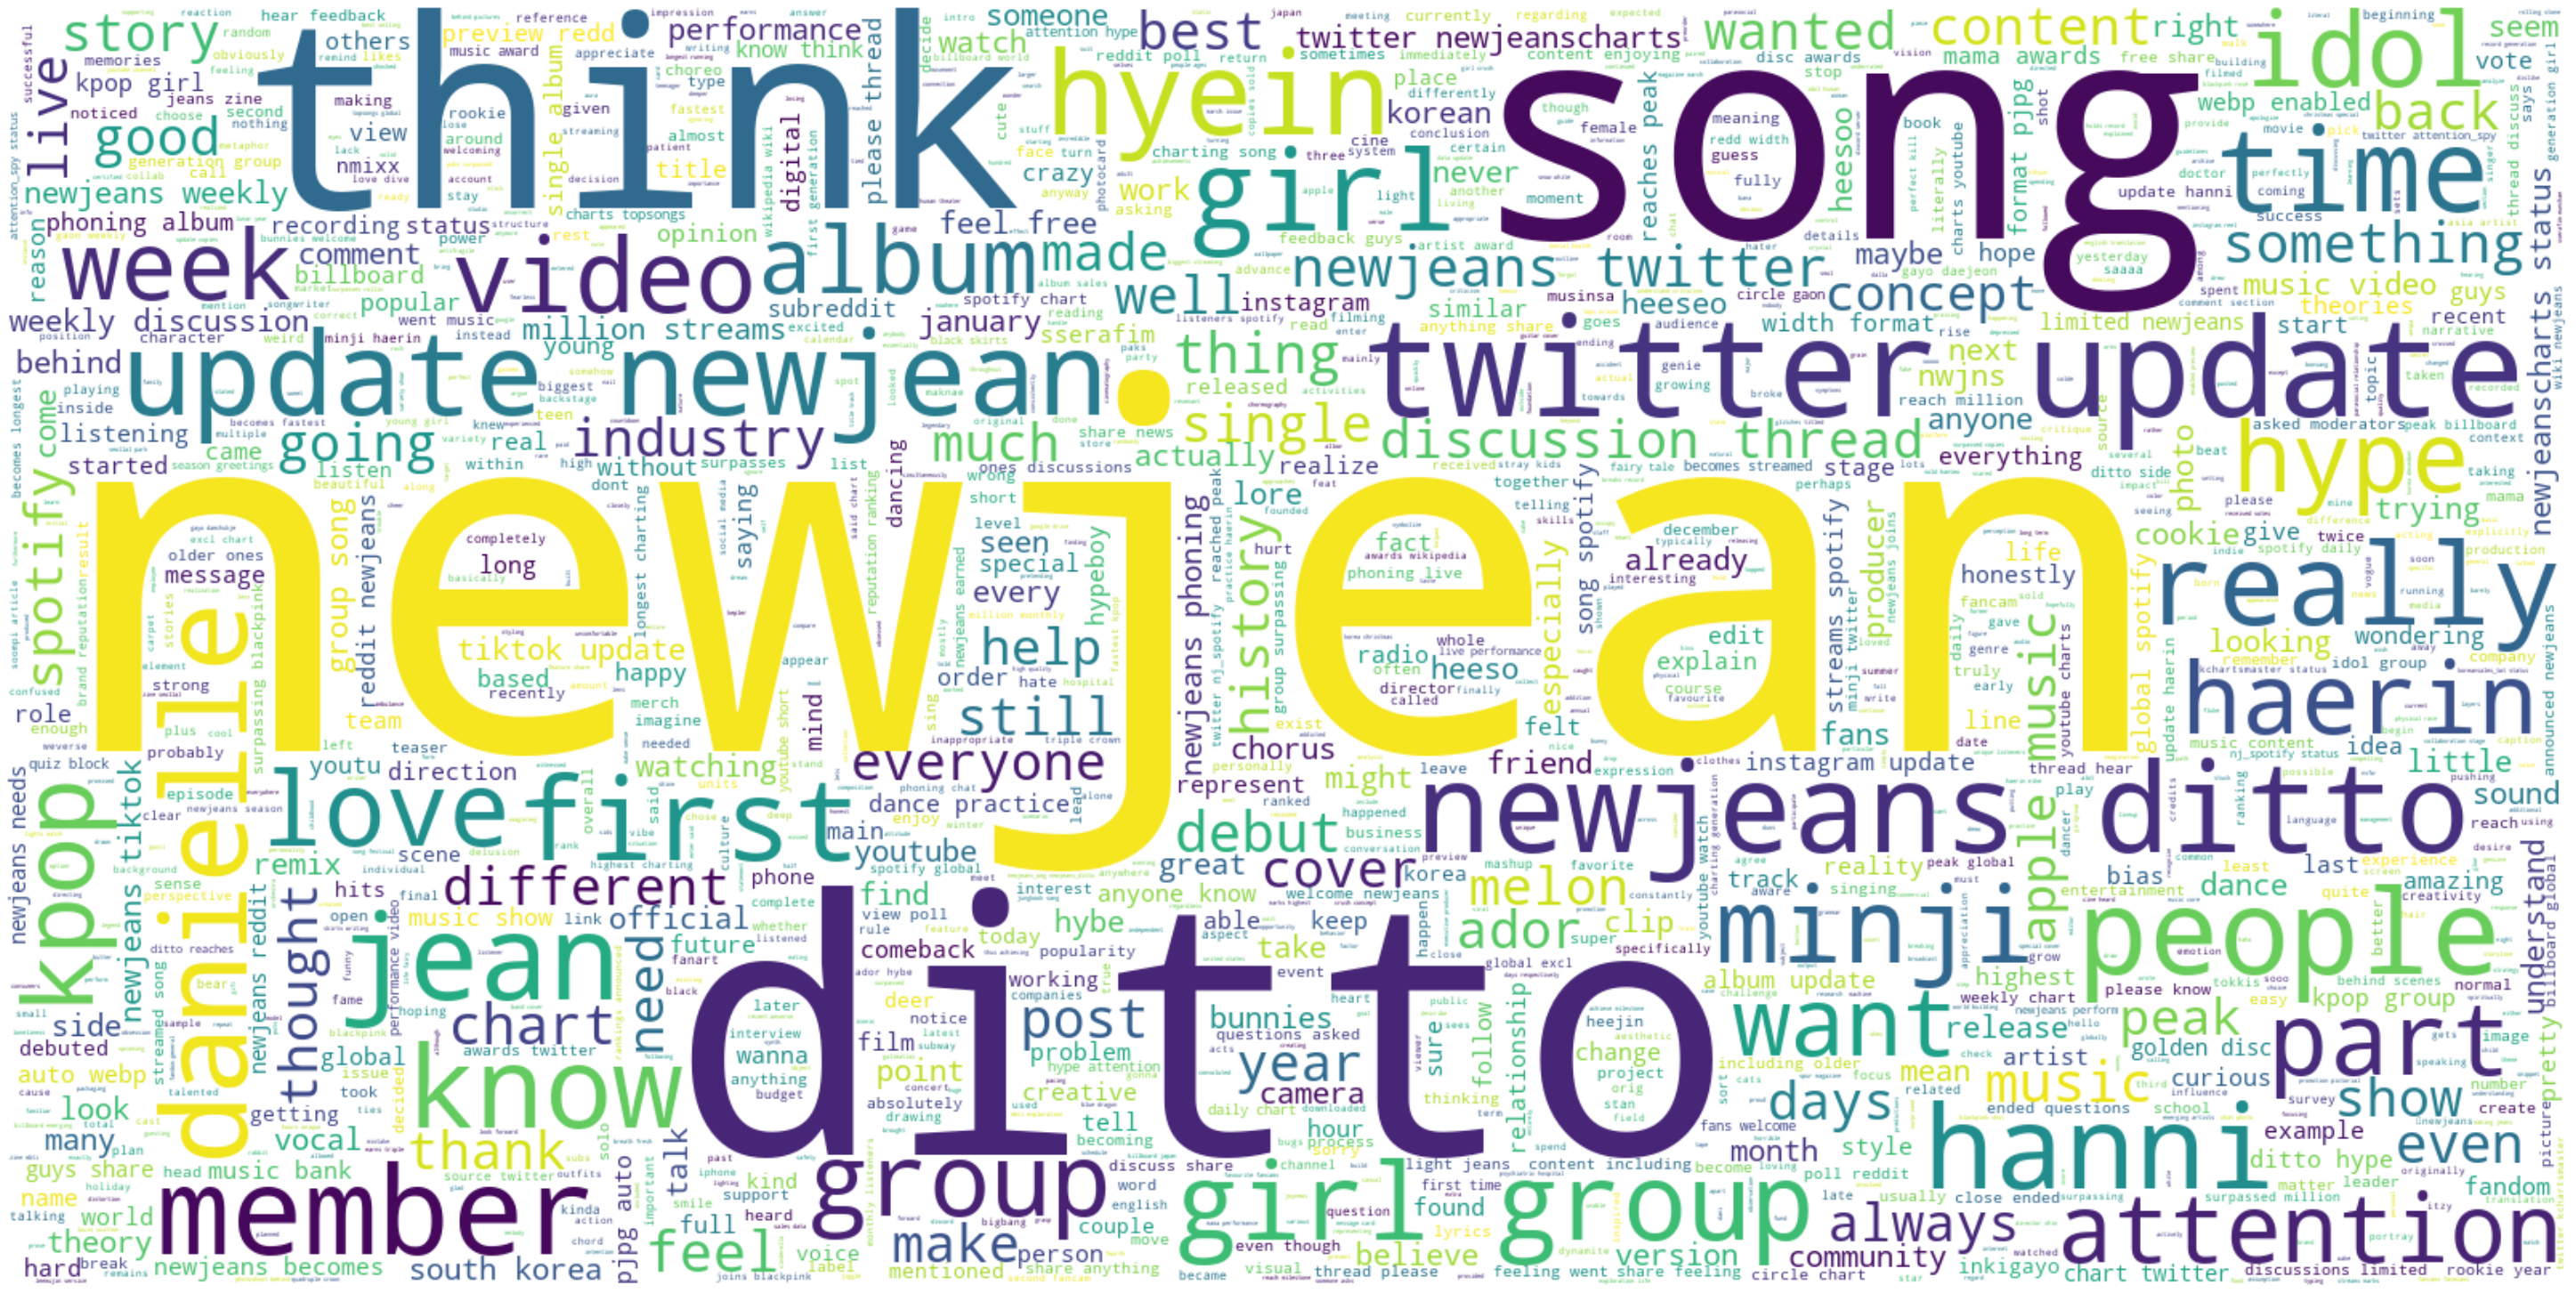

In [8]:
#Word cloud for NewJeans
cloud = WordCloud(max_words = 1800, 
                  width = 1600, 
                  height = 800,
                  stopwords = STOPWORDS, 
                  background_color = "white").generate(" ".join(newjeans.text))
plt.figure(figsize=(40, 30))
plt.imshow(cloud, interpolation="bilinear")
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

           Frequency
Word                
blackpink        618
update           349
pink             258
born             217
tour             197
world            181
jennie           165
jisoo            160
lisa             159
rosé             152


C:\Users\dylan\AppData\Local\Temp\ipykernel_25392\2529387044.py:4: FutureWarning: The default value of regex will change from True to False in a future version.
  txt = blackpink.text.str.lower().str.replace(r'\|', ' ').str.cat(sep=' ')


<AxesSubplot:xlabel='Word'>

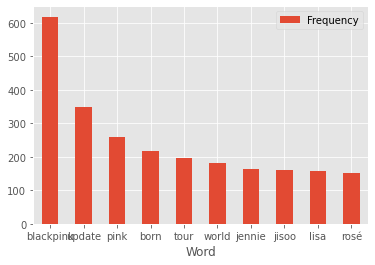

In [20]:
#calculate top terms for blackpink
top_N = 10

txt = blackpink.text.str.lower().str.replace(r'\|', ' ').str.cat(sep=' ')
words = nltk.tokenize.word_tokenize(txt)
word_dist = nltk.FreqDist(words)

stopwords = nltk.corpus.stopwords.words('english')
words_except_stop_dist = nltk.FreqDist(w for w in words if w not in stopwords) 

rslt = pd.DataFrame(words_except_stop_dist.most_common(top_N),
                    columns=['Word', 'Frequency']).set_index('Word')
print(rslt)
plt.style.use('ggplot')

rslt.plot.bar(rot=0)

          Frequency
Word               
newjeans        984
ditto           349
twitter         200
update          200
music           180
like            173
group           171
song            144
think           124
spotify         121


C:\Users\dylan\AppData\Local\Temp\ipykernel_25392\2367239390.py:4: FutureWarning: The default value of regex will change from True to False in a future version.
  txt = newjeans.text.str.lower().str.replace(r'\|', ' ').str.cat(sep=' ')


<AxesSubplot:xlabel='Word'>

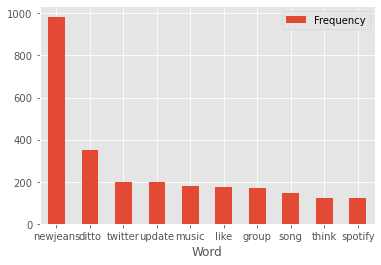

In [21]:
#top terms for newjeans
top_N = 10

txt = newjeans.text.str.lower().str.replace(r'\|', ' ').str.cat(sep=' ')
words = nltk.tokenize.word_tokenize(txt)
word_dist = nltk.FreqDist(words)

stopwords = nltk.corpus.stopwords.words('english')
words_except_stop_dist = nltk.FreqDist(w for w in words if w not in stopwords) 

rslt = pd.DataFrame(words_except_stop_dist.most_common(top_N),
                    columns=['Word', 'Frequency']).set_index('Word')
print(rslt)
plt.style.use('ggplot')

rslt.plot.bar(rot=0)

## Short student exercise

Play around with some optional arguments of the WordCloud, for example, background_color

In [22]:
#try changing the background color to black, and setting max_words to 30. feel free to work with Blackpink or Newjeans data 


## Additional Information - check after class

If you want to save the image, WordCloud provides a function to_file

In [19]:
wordcloud.to_file("/Users/chunyangzhang/Desktop/macs30112/localcourse-materials/lectures/week6/hw4/first_review.png")

We will show in the following how we can create word clouds with special shapes. We will use the shape of the dove from the following picture:

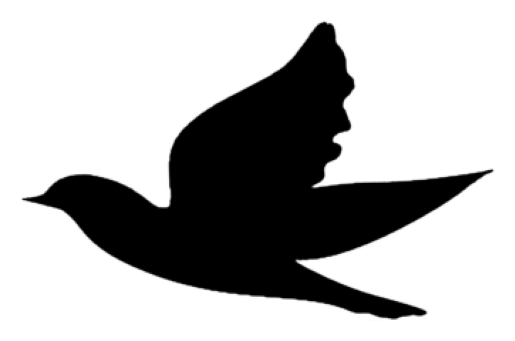

In [9]:
dove_mask = np.array(Image.open("/Users/chunyangzhang/Desktop/macs30112/localcourse-materials/lectures/week6/hw4/doveshape.png"))
#dove_mask[230:250, 240:250]
plt.imshow(dove_mask)
plt.axis("off")
plt.show()

If the parameter repeat is set to True the words and phrases will be repeated until max_words (default 200) or min_font_size (default 4) is reached.

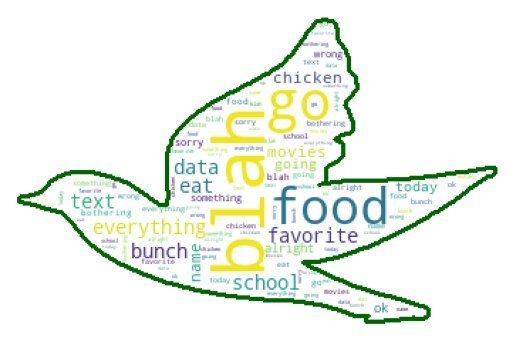

In [13]:
wordcloud = WordCloud(background_color="white", 
                      mask=dove_mask,
                      contour_width=3, 
                      repeat=True,
                      min_font_size=3,
                      contour_color='darkgreen')

# Generate a wordcloud
wordcloud.generate(string)

# show
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

Creating Wordcloud Following a Color Pattern

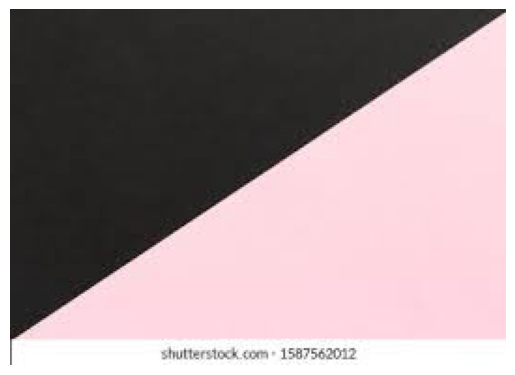

In [22]:
bp_color = np.array(Image.open("bp.jpeg"))
plt.imshow(bp_color)
plt.axis("off")
plt.show()

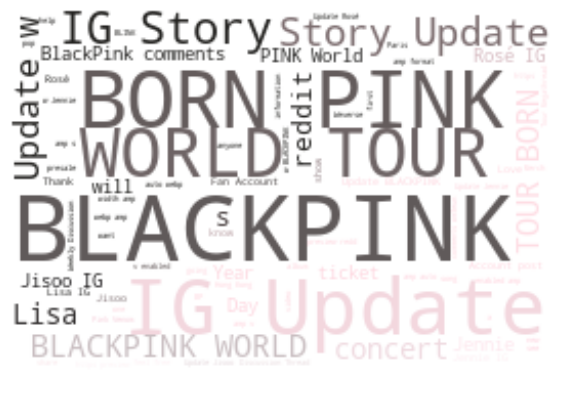

In [21]:
# Generate a word cloud image
mask = np.array(Image.open("bp.jpeg"))
wordcloud_usa = WordCloud(stopwords=STOPWORDS, background_color="white", mode="RGBA", max_words=1000, mask=mask).generate(" ".join(blackpink.text))

# create coloring from image
image_colors = ImageColorGenerator(mask)
plt.figure(figsize=[7,7])
plt.imshow(wordcloud_usa.recolor(color_func=image_colors), interpolation="bilinear")
plt.axis("off")

plt.show()